In [1]:
import pandas as pd
import numpy as np
import quantstats as qs
import matplotlib.pyplot as plt

# Data
- benchmark : 台灣加權股價指數(Y9999)
- Strategy : 台灣所有上市上櫃公司
- 類別 : 報酬率資料
- 時間 : 2010/01/01 ~ 2023/06/30
- 來源 : TEJ

In [2]:
benchmark = pd.read_csv('Y9999.txt', sep='#', encoding='ANSI', low_memory=False)  # 讀取data
benchmark.columns = ['ticker','name', 'date', 'return']
benchmark['return'] /= 100  # 單位 : % -> 小數
benchmark['date'] = pd.to_datetime(benchmark['date'].astype(str))  # data type -> datetime64 (針對原始data，type(date)要先轉乘成str函數.to_datetime才能正確讀取
benchmark = benchmark.set_index('date')['return']
benchmark.name = 'benchmark'
benchmark

date
2010-01-04    0.002411
2010-01-05    0.000433
2010-01-06    0.014153
2010-01-07   -0.010831
2010-01-08    0.005278
                ...   
2023-06-26   -0.008322
2023-06-27   -0.010044
2023-06-28    0.002826
2023-06-29    0.000394
2023-06-30   -0.001579
Name: benchmark, Length: 3313, dtype: float64

In [3]:
data = pd.read_csv('stock.txt', sep='#', encoding='ANSI', low_memory=False)  # 讀取data
data.columns = ['ticker', 'name', 'date', 'return', 'turnover', 'market_cap(million)']  # 改column名稱
data['return'] /= 100  # 單位 : % -> 小數
data['turnover'] /= 100  # 單位 : % -> 小數
data['ticker'] = data['ticker'].astype(str)  # type(ticker) -> str
data['date'] = pd.to_datetime(data['date'].astype(str))  # data type -> datetime64 (針對原始data，type(date)要先轉乘成str函數.to_datetime才能正確讀取)
data

,ticker,name,date,return,turnover,market_cap(million)
0,1101,台泥,2010-01-04,0.008824,0.002521,112921
1,1102,亞泥,2010-01-04,-0.001445,0.002186,103157
2,1103,嘉泥,2010-01-04,0.016575,0.008018,13208
3,1104,環泥,2010-01-04,0.051429,0.012449,11111
4,1108,幸福,2010-01-04,0.008939,0.008079,3654
...,...,...,...,...,...,...
4978421,9949,琉園,2023-06-30,0.000000,0.000023,705
4978422,9950,萬國通,2023-06-30,-0.051339,0.004478,3564
4978423,9951,皇田,2023-06-30,0.000000,0.001322,5603
4978424,9960,邁達康,2023-06-30,0.008418,0.000893,1006


In [4]:
return_df = data.pivot(index='date', columns='ticker', values='return').copy()  # 調整data方便後續分析(使用copy可以不修改原始data)
return_df

ticker,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.008824,-0.001445,0.016575,0.051429,0.008939,0.014286,0.022026,-0.014908,-0.005825,-0.004261,...,0.017308,0.012911,-0.011194,-0.006098,0.011204,0.007599,0.022508,0.044898,-0.036789,-0.006135
2010-01-05,0.034985,0.021708,-0.005435,-0.016304,-0.007752,0.004695,0.008621,0.001164,-0.001953,0.001427,...,-0.020794,0.001159,-0.003774,-0.003067,0.008310,-0.025641,-0.012579,-0.042969,0.006944,-0.012346
2010-01-06,0.021127,0.007082,-0.016393,0.008287,-0.001116,0.009346,0.012821,0.000000,0.005871,0.017094,...,0.003861,0.011574,-0.011364,-0.004615,0.024725,-0.004644,0.014331,0.024490,0.068966,0.000000
2010-01-07,-0.019310,-0.011252,-0.016667,-0.024658,0.016760,0.004630,-0.004219,-0.002326,-0.011673,-0.016807,...,0.015385,-0.017162,0.000000,-0.020093,0.008043,-0.007776,-0.017268,-0.011952,-0.006452,0.000000
2010-01-08,-0.004219,0.005690,0.014124,0.005618,0.010989,0.000000,0.008475,-0.009324,0.003937,0.008547,...,0.013258,-0.001164,-0.003831,-0.028391,-0.034574,0.006270,-0.001597,0.016129,0.008117,-0.006250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,0.002584,0.009050,-0.045952,-0.008078,0.002933,-0.005348,-0.013055,0.002463,0.008724,0.001919,...,-0.006944,0.005579,-0.010345,0.000000,0.098361,-0.001316,0.000000,0.004464,-0.001669,0.002513
2023-06-27,-0.009021,-0.006726,-0.020642,0.000000,-0.023392,-0.005376,-0.002646,-0.004914,0.015135,-0.003831,...,0.004662,-0.002774,-0.006969,0.003135,0.084577,-0.014493,-0.002070,0.004444,-0.006689,0.007519
2023-06-28,-0.010403,0.006772,0.009368,-0.001629,0.029940,-0.002703,0.007958,-0.002469,0.011715,0.013462,...,-0.018561,0.005563,0.000000,0.000000,0.009174,0.004011,0.000000,0.044248,-0.001684,0.019900


# Strategy

In [5]:
def signal(data:pd.DataFrame, days:int, N:int, min_counts:int=1, min_periods:int=1) -> pd.DataFrame :
    '''
    功能 : 偵測動能訊號，只賦予data中過去days天漲幅最多的前N檔股票訊號
    參數 :
        1. data : 日報酬率資料，type=pd.DataFrame，index=date，columns=tickers
        2. days : 要取過去多少天計算累積報酬率，type=int
        3. N : 持股數量，固定買進過去漲幅最多的前N檔股票，type=int
        4. min_counts : 有效股票數目的閾值。若data中當天有效股票數目(非零資料量)<mincount則return nan，default=1，type=int
        5. min_periods : 計算累積報酬率的閾值。若該股票過去資料量<min_periods則value=nan，default=1，type=int
    輸出 :
        momentum_signal : 訊號資料，有訊號value>0；無訊號value=0，type=pd.DataFrame
    '''
    # 複製原來的data，避免修改到原data
    data = data.copy()

    # 訊號處理
        # 計算所有股票過去days天累積報酬
    cum_ret_df = data.rolling(days, min_periods).sum()  # type=pd.DataFrame

        # 偵測訊號
    for t in data.index :
        cum_ret_df.loc[t,:] = cum_ret_df.loc[t,:].rank()  # 賦予當日累積報酬rank，type=pd.Series
                                                          # 使用rank用意 : 
                                                          # 使用原始信號分配權重可能發生權重過度集中在某幾個股票(離群值)
                                                          # 為降低風險，將原始信號轉換成rank
                                                          # 如此一來，既保留原始訊號的大小順序關係，又可以控制住權重不會過度集中
        sorted_cum_ret = cum_ret_df.loc[t,:].sort_values(ascending=False)  # 排序:高->低，排名愈前面漲幅愈大，type=pd.Series
        topN1 = sorted_cum_ret[N:N+1]  # 選取漲幅最多的第N+1檔股票，type=pd.Series
        cum_ret_df.loc[t,:] = cum_ret_df.loc[t,:] - topN1.values  # value>0的股票即為漲幅最多的前N檔股票，type=pd.DataFrame

        # 訊號數值
    cum_ret_df[ cum_ret_df <= 0 ] = 0  # 漲幅<=第N+1檔股票的signal=0
    momentum_signal = cum_ret_df.fillna(0)  # nan填0

    return momentum_signal

In [6]:
def normalize(data:pd.DataFrame) -> pd.DataFrame :
    '''
    功能 : 將data進行標準化，使data的每個row總和為1
    參數 :
        data : 欲進行標準化的data，type=pd.DataFrame，index=date，columns=tickers
    輸出 :
        data : 標準化後的data，，type=pd.DataFrame，index=date，columns=tickers
    '''
    # 複製原來的data，避免修改到原data
    data = data.copy()

    # 標準化
    for t in data.index :
        sum_ = data.loc[t,:].sum()  # 計算當天總報酬
        sum_ = sum_ if sum_!= 0 else np.nan  # 避免分母(sum_)=0時下行code會報錯
        data.loc[t,:] = data.loc[t,:] / sum_  # 標準化當天各個data

    return data

# Backtest

In [7]:
def calc_turnover_rate(data:pd.DataFrame, weights:pd.DataFrame) -> pd.DataFrame :
    '''
    功能 : 計算投組中每個股票的日週轉率
    參數 : 
        1. data : 日報酬率資料，type=pd.DataFrame，index=date，columns=tickers
        2. weights : 投組權重，type=pd.DataFrame，index=date，columns=tickers
    輸出 :
        firm_turnover_rate : 投組中每個股票的日週轉率，type=pd.DataFrame，index=date，columns=tickers
    '''
    # 複製原來的data和weights，避免修改到原始資料
    data = data.copy()
    weights = weights.copy()

    # 計算每檔股票的週轉率
    weights = weights.fillna(0)  # nan填0避免影響下行code的計算
    weights_drift = weights.shift(1) * ( data.add(1) )
    weights_drift = normalize(weights_drift)  # 標準化，使權重介於0~1
    firm_turnover_rate = (weights_drift - weights).abs()  # 計算週轉率

    return firm_turnover_rate

In [8]:
def backtest(data:pd.DataFrame, weights:pd.DataFrame, transaction_cost:float) :
    '''
    功能 : 回測一組weights的績效
    輸入 :
        1. data : 日報酬率資料(原始data)，type=pd.DataFrame，index=date，columns=tickers
        2. weights : 欲回測的權重，由策略所計算出來，type=pd.DataFrame，index=date，columns=tickers
        3. transaction_cost : 單邊交易成本，台股抓0.002，type=float
    輸出 :
        1. strategy_gross_return : 略策歷史毛報酬，type=pd.Series
        2. strategy_net_return : 略策歷史淨報酬，type=pd.Series
    '''
    # 複製原來的data和weights，避免修改到原始資料
    data = data.copy()
    weights = weights.copy()

    # 交易成本
    firm_turnover_rate = calc_turnover_rate(data, weights)
    firm_transaction_cost = firm_turnover_rate * transaction_cost

    # 計算每檔股票報酬
    firm_gross_return = (weights.shift(1) * data).fillna(0)  # 每檔股票各自的毛報酬(未扣除交易成本)  
            # .shift(1)的原因為weights是用第t期以前的data所計算出來的，記為weights_t；持有股票的各自報酬率發生在t+1時期，記為data_t+1
            # 我們是在第t期收盤後計算策略權重，第t+1期一開盤買進，每檔股票各自報酬_t+1 = weights_t * data_t+1
            # fillna(0) : nan填0
    firm_net_return = firm_gross_return - firm_transaction_cost  # 每檔股票各自的淨報酬(扣除交易成本)

    # 計算策略報酬
    strategy_gross_return = firm_gross_return.sum(axis=1).fillna(0)  # 策略毛報酬(未扣除交易成本)，axis=1針對index(row)方向加總，計算每日策略報酬 
    strategy_net_return = firm_net_return.sum(axis=1).fillna(0)  # 策略淨報酬(扣除交易成本)
    
    return strategy_gross_return, strategy_net_return

In [9]:
momentum_signal = signal(data=return_df, days=63, N=50, min_counts=100, min_periods=63)  #偵測動能訊號
momentum_weights = normalize(data=momentum_signal)  # 根據訊號決定持有權重(標準化權重到0~1)
momentum_weights.fillna(0)  # nan填0避免影響到報酬率計算
strategy_gross_return,  strategy_net_return = backtest(data=return_df, weights=momentum_weights, transaction_cost=0.002)  # 回測動能策略績效

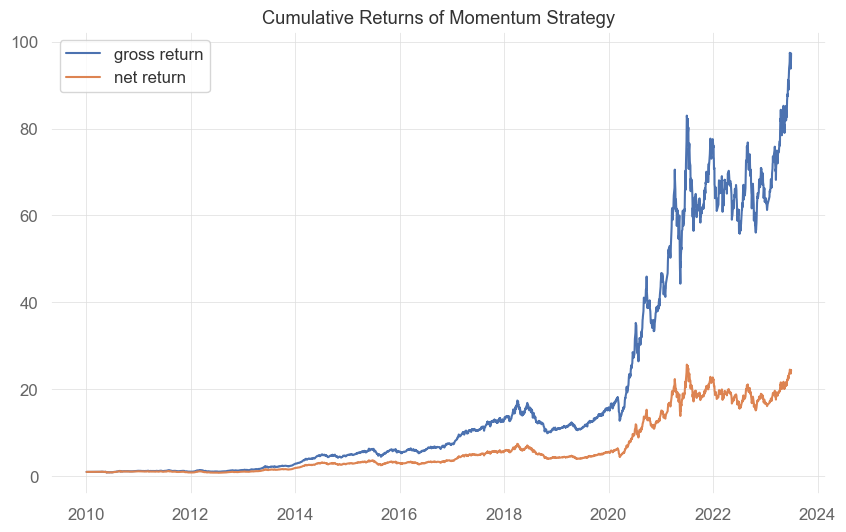

In [10]:
cum_strategy_gross_return = strategy_gross_return.add(1).cumprod()  # 累積毛報酬
cum_strategy_net_return = strategy_net_return.add(1).cumprod()  # 累積淨報酬
plt.title( 'Cumulative Returns of Momentum Strategy' )
gross_return_plot = plt.plot(cum_strategy_gross_return, label='gross return')  # 累積毛報酬的圖
net_return_plot = plt.plot(cum_strategy_net_return, label='net return')  # 累積淨報酬的圖
plt.legend()

In [11]:
# 毛報酬
gross_mean = strategy_gross_return.mean()*252
gross_std = strategy_gross_return.std()*(252**0.5)
gross_sharpe = gross_mean / gross_std
gross_series = pd.Series([gross_mean, gross_std, gross_sharpe], index=['annual ret', 'annual std', 'sharpe'])

# 淨報酬
net_mean = strategy_net_return.mean()*252
net_std = strategy_net_return.std()*(252**0.5)
net_sharpe = net_mean / net_std
net_series = pd.Series([net_mean, net_std, net_sharpe], index=['annual ret', 'annual std', 'sharpe'])

pd.DataFrame( { 'gross':gross_series, 'net':net_series } )

,gross,net
annual ret,0.385215,0.280119
annual std,0.270513,0.270652
sharpe,1.424016,1.034979


# 異常表現
- 跡象 : 在2021~2023策略累積報酬突然暴增
- 推測 : 某些股票的在這段時間的報酬率極高，導致這些股票的signal極大(持有權重極大)
- 檢驗方法 : 將股票總報酬貢獻度進行排序，查看是否貢獻度集中在某些股票上

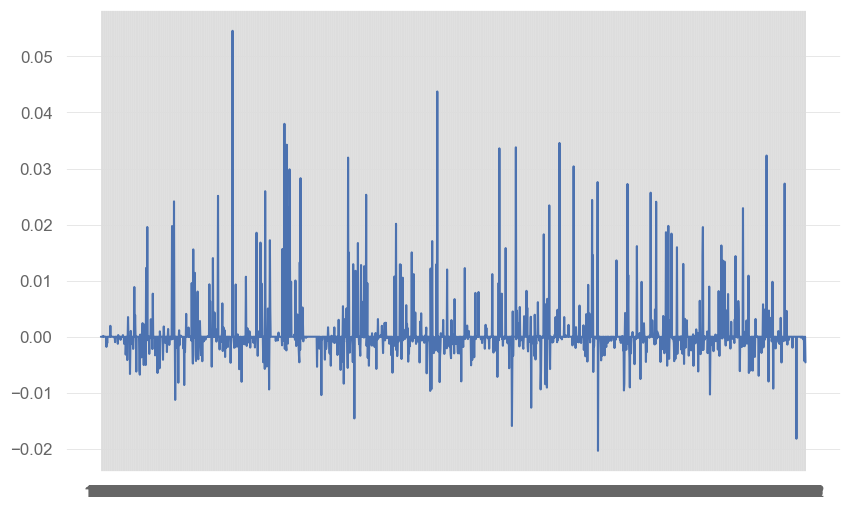

In [12]:
# 依據公司類別進行加總，計算各個股票在2021~2023的總報酬貢獻
firm_total_return = ( return_df.loc['2021-01-01':] * momentum_weights.shift(1).loc['2021-01-01':] ).sum(axis=0)
plt.plot( firm_total_return.index, firm_total_return)

- 由上圖可發現有幾檔股票的總報酬貢獻度特別高
- 下圖將總報酬貢獻度由高至低進行排序

In [13]:
# 總報酬貢獻排行(高->低)
firm_total_return.sort_values(ascending=False)

ticker
2364    0.054566
3701    0.043741
2609    0.037975
5475    0.034562
2615    0.034249
          ...   
5227   -0.012654
3138   -0.014570
4943   -0.015917
9928   -0.018189
6150   -0.020344
Length: 1794, dtype: float64

- 發現有些股票的總報酬貢獻度特高
- 下圖為貢獻度最高的『倫飛(2364)』的股價趨勢圖
- 倫飛(2364)
    - 產業類別 : 電腦週邊
    - 主要經營業務 : 製造買賣筆記型電腦

<Axes: xlabel='date'>

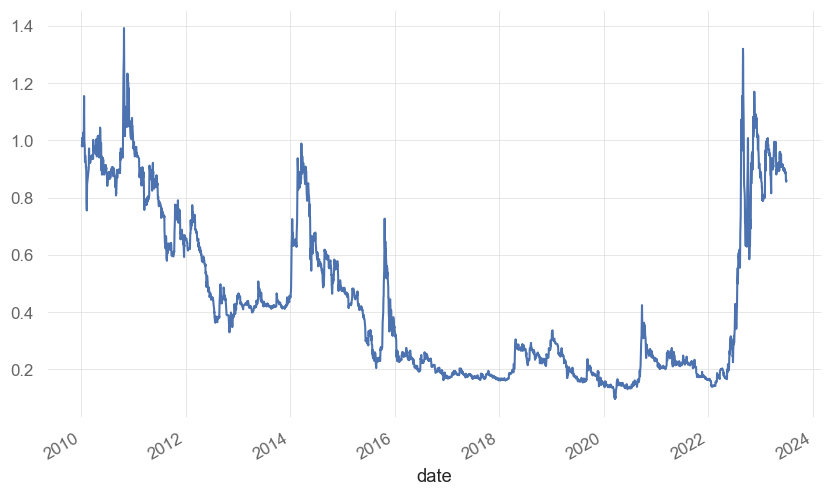

In [14]:
return_df['2364'].add(1).cumprod().plot()

# 參數最佳化 - days

<Axes: title={'center': 'Sharpe ratio for different time horizons '}>

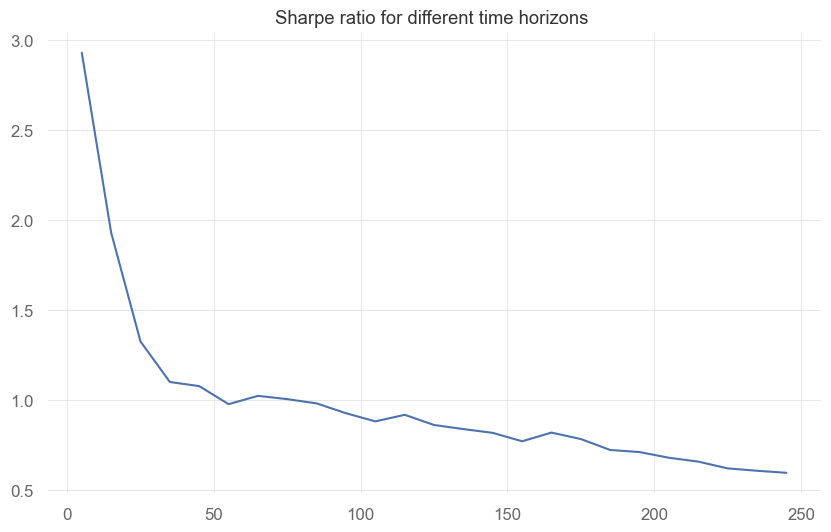

In [15]:
days_list = range(5,252,10)
sharpe_list = []
for d in days_list :
    momentum_signal_days_temp = signal(data=return_df, days=d, N=50, min_counts=100, min_periods=d)  #偵測動能訊號
    momentum_weights_days_temp = normalize(data=momentum_signal_days_temp)  # 根據訊號決定持有權重
    strategy_gross_return_temp,  strategy_net_return_temp  = backtest(data=return_df, weights=momentum_weights_days_temp, transaction_cost=0.002)  # 回測動能策略績效
    net_mean_temp = strategy_net_return_temp.mean()*252  # 策略(算術)平均報酬
    net_std_temp = strategy_net_return_temp.std()*(252**0.5)  # 策略標準差
    net_sharpe_temp = net_mean_temp / net_std_temp  # 策略Sharpe
    sharpe_list.append(net_sharpe_temp)
pd.Series(sharpe_list, index = days_list).plot( title = 'Sharpe ratio for different time horizons ')

In [16]:
# 依sharpe由大排到小
pd.Series(sharpe_list, index = days_list).sort_values(ascending=False)

5      2.929402
15     1.930968
25     1.326665
35     1.101849
45     1.078887
65     1.024898
75     1.006585
85     0.982980
55     0.978767
95     0.928399
115    0.919617
105    0.883227
125    0.863020
135    0.840361
165    0.820888
145    0.819349
175    0.785043
155    0.772640
185    0.724378
195    0.712656
205    0.681205
215    0.659782
225    0.622158
235    0.609016
245    0.597630
dtype: float64

# 檢驗每日持股數量是否有成功固定住

- 每日訊號數量 = 持有標的數量

In [17]:
momentum_signal = signal(data=return_df, days=252, N=50, min_counts=100, min_periods=63)  #偵測動能訊號
momentum_weights = normalize(data=momentum_signal)  # 根據訊號決定持有權重(標準化權重到0~1)
momentum_weights.fillna(0)  # nan填0避免影響到報酬率計算
strategy_gross_return,  strategy_net_return = backtest(data=return_df, weights=momentum_weights, transaction_cost=0.002)  # 回測動能策略績效

<Axes: title={'center': 'Daily Signal Count'}, xlabel='date'>

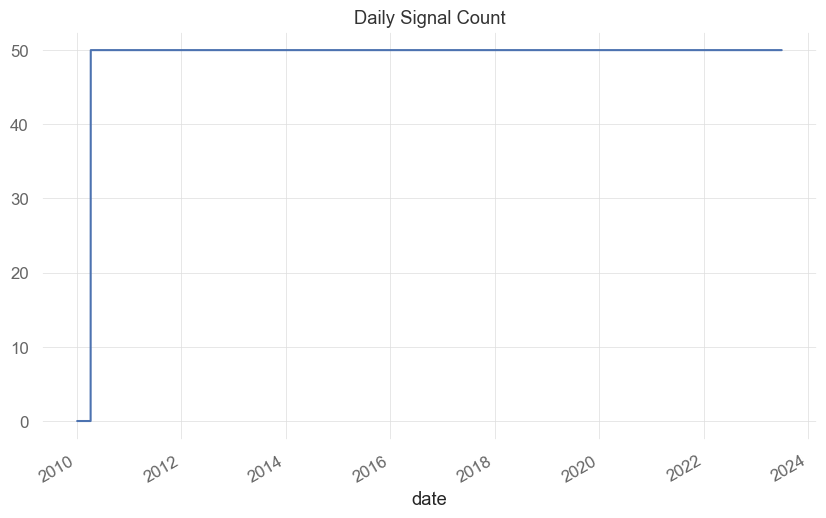

In [18]:
# momentum_signal>0 -> 買進
(momentum_signal>0).astype(int).sum(axis=1).plot( title = 'Daily Signal Count' )  # 計算momentum_signal>0的數量

# 使用最佳參數設定生成分析圖表

In [19]:
# 最佳參數設定(使sharpe ratio 最大)
momentum_signal_best = signal(data=return_df, days=5, N=50, min_counts=100, min_periods=5)  # 偵測動能訊號
momentum_weights_best = normalize(data=momentum_signal_best)  # 根據訊號決定持有權重(標準化權重到0~1)
momentum_weights_best.fillna(0)  # nan填0避免影響到報酬率計算
best_strategy_gross_return,  best_strategy_net_return = backtest(data=return_df, weights=momentum_weights_best, transaction_cost=0.002)  # 回測動能策略績效

In [20]:
# 使用套件生成一個html檔案，包含精美分析圖表
qs.reports.html(best_strategy_net_return, benchmark=benchmark, output='Strategy performance analysis.html', titile='strategy', download_filename='strategy.html')

C:\Users\Administrator.USER-20180817XC\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Administrator.USER-20180817XC\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Administrator.USER-20180817XC\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future ver